# **Term Deposit Subscription Prediction (Bank Marketing)**

**Problem Statement:**

Banks often struggle to identify which clients are most likely to subscribe to term deposits during direct marketing campaigns. Inefficient targeting leads to wasted resources, lower success rates, and reduced customer satisfaction. Using the Portuguese Bank Marketing dataset, the goal is to build a predictive model that classifies whether a client will subscribe to a term deposit based on demographic, financial, and campaign-related attributes, enabling the bank to optimize marketing strategies and improve campaign effectiveness.

**Objective:**

Predict whether a bank customer will subscribe to a term deposit as a result of a marketing
campaign.


**Dataset : Bank Marketing Dataset**

**Description :**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Dataset Loading**

In [ ]:
df=pd.read_csv('/content/sample_data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Conlusion: we have no missing values while we have to encode categorical variable

In [ ]:
#statstical description dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**DAta Normalization**

Data normalization is used to bring numerical features to a comparable scale, reduce bias from different ranges, and improve model performance. Z-score scaling is chosen because it centers data around zero with unit variance, making it suitable for algorithms like Logistic Regression that assume normally distributed inputs.

In [ ]:
from sklearn.preprocessing import StandardScaler

#select numeric features

numeric_features= ['age','balance','day','duration','campaign','pdays','previous']

#initialize scalar

scalar= StandardScaler()

#Apply Z-score normalization

df[numeric_features]=scalar.fit_transform(df[numeric_features])

#print few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1.930226,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,3.154612,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,2.929901,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,0.596366,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,0.867171,-0.186785,-0.481184,-0.36326,unknown,yes


In [ ]:
# categorical variables
df[['job','marital','education','default','housing','loan','contact','month','poutcome']].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,no,no,cellular,may,unknown
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326


In [ ]:
#ecnoding categorical variables

df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'], drop_first= True)
df.head()


,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,yes,False,False,...,False,False,False,True,False,False,False,False,False,True
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,yes,False,False,...,False,False,False,True,False,False,False,False,False,True


**Exploratory data Analysis (EDA)**

In [ ]:
#check rows and collmns
df.shape

(11162, 43)

In [ ]:
#data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  float64
 3   duration             11162 non-null  float64
 4   campaign             11162 non-null  float64
 5   pdays                11162 non-null  float64
 6   previous             11162 non-null  float64
 7   deposit              11162 non-null  object 
 8   job_blue-collar      11162 non-null  bool   
 9   job_entrepreneur     11162 non-null  bool   
 10  job_housemaid        11162 non-null  bool   
 11  job_management       11162 non-null  bool   
 12  job_retired          11162 non-null  bool   
 13  job_self-employed    11162 non-null  bool   
 14  job_services         11162 non-null  bool   
 15  job_student          11162 non-null 

In [ ]:
#convert target variable "deposit" from categorica (yes/no) to numeric (1/0)
df['deposit'] = df['deposit'].map({'yes' : 1, 'no' : 0})

In [ ]:
#check data type of target variable
df['deposit'].dtype

dtype('int64')

In [ ]:
df['deposit'].value_counts()

,count
deposit,
0,5873
1,5289


In [ ]:
#basic statsics
df.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,11162.000000
mean,2.749995e-16,1.018517e-17,-2.037033e-17,8.148134e-17,3.055550e-17,5.092584e-18,-2.037033e-17,0.473840
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,0.499338
min,-1.950161e+00,-2.596850e+00,-1.740784e+00,-1.065918e+00,-5.541683e-01,-4.811841e-01,-3.632598e-01,0.000000
25%,-7.749580e-01,-4.360996e-01,-9.094664e-01,-6.741146e-01,-5.541683e-01,-4.811841e-01,-3.632598e-01,0.000000
50%,-1.873565e-01,-3.033975e-01,-7.814820e-02,-3.370484e-01,-1.867854e-01,-4.811841e-01,-3.632598e-01,0.000000
75%,6.520742e-01,5.564233e-02,7.531699e-01,3.572503e-01,1.805976e-01,-2.811903e-01,7.305850e-02,1.000000
max,4.513455e+00,2.470351e+01,1.822008e+00,1.010912e+01,2.222358e+01,7.380638e+00,2.494320e+01,1.000000


In [ ]:
#check duplicates values
df.duplicated().sum()

np.int64(0)

**Data Visualization**

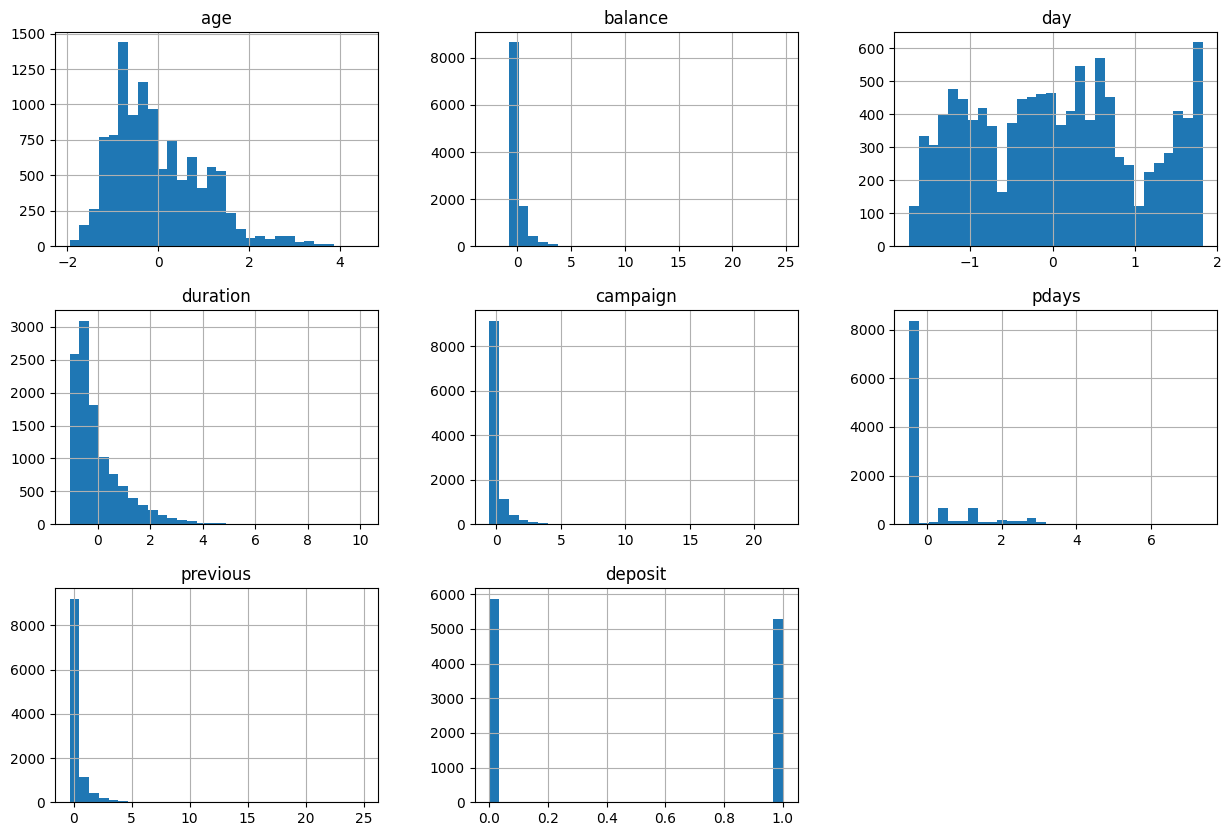

In [ ]:
#histogram for numeric variables
df.hist(figsize=(15,10),bins= 30)
plt.show()

Observations from the histogram:

Age → Fairly normal-ish distribution but slightly right-skewed. Most customers are between 25–60 years.

Balance → Highly right-skewed. Most customers have very low or negative balance, with a few having very high balances (outliers).

Day → Roughly uniform distribution (contacts are spread across the days of the month, no strong preference).

Duration → Strongly right-skewed. Most calls are short (few seconds to a couple of minutes), very few long calls (outliers).

Campaign → Right-skewed. Most clients were contacted only a few times; very few contacted many times.

Pdays → Mostly at -1 (not previously contacted). Few values > 0 (indicating some were contacted earlier).

Previous → Again right-skewed. Most clients had 0 previous contacts, very few had many.

Deposit (Target) → Imbalanced dataset. More people said “no” (0) than “yes” (1) to subscribing.

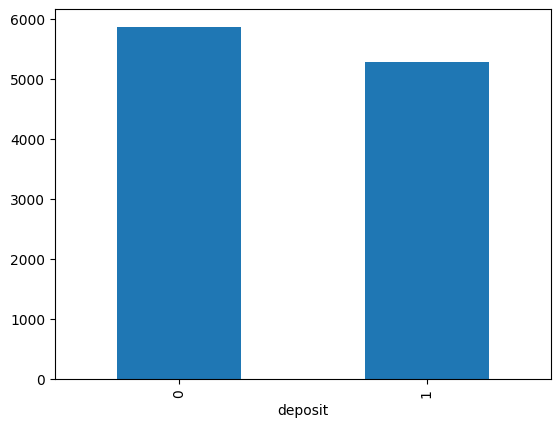

In [ ]:
#bar plot for target variables
df['deposit'].value_counts().plot(kind='bar')
plt.show()




Observation from above plot:

dataset almost balance (slightly more 0s then 1s)

<Axes: >

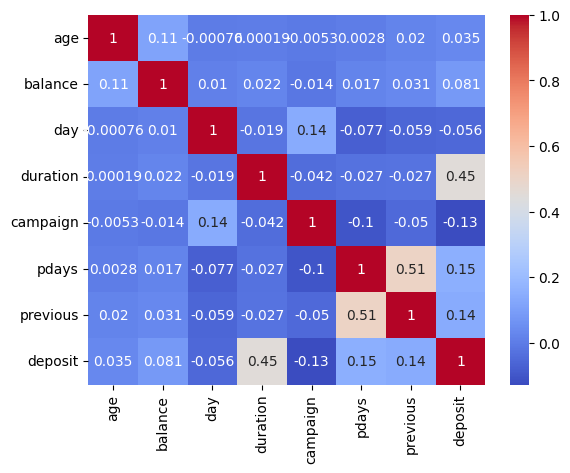

In [ ]:
#heatmap for checking corelation
num_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")

**key insights from the heatmap:**

**duration vs deposit**  → Strongest positive correlation (0.45) → The longer the call duration, the more likely the customer subscribes to the deposit.

**balance vs deposit** → Weak positive correlation (0.08) → Customers with higher balances are slightly more likely to subscribe.

**pdays vs previous** → Very strong correlation (0.51) → Makes sense because both relate to past campaign contacts.

Most other features (like age, day, campaign) show very weak or near-zero correlation with the target

# Model Development

In [ ]:
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve



In [ ]:
#splitting data set
X=df.drop('deposit' ,axis=1)
y=df['deposit']
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#train logistic regression
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#prediction
y_pred=log_reg.predict(X_test)
y_proba_lr=log_reg.predict_proba(X_test)[:,1]

In [ ]:
#evaluation
print("Accuracy : ",accuracy_score(y_test, y_pred))
print("classification report : ", classification_report(y_test, y_pred))
print("confusion matrix : ", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))

Accuracy :  0.8078817733990148
classification report :                precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

confusion matrix :  [[971 195]
 [234 833]]
ROC AUC Score: 0.900123942828758


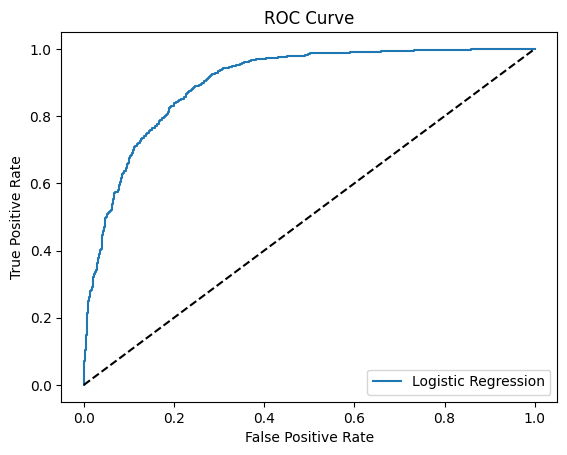

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Conlusion:**

The ROC curve lies well above the diagonal, with an AUC ≈ 0.90, showing the model has excellent ability to distinguish between deposit (1) and no deposit (0).

Random Forest Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

Confusion Matrix:
 [[956 210]
 [148 919]]
ROC AUC Score: 0.9129088626356578


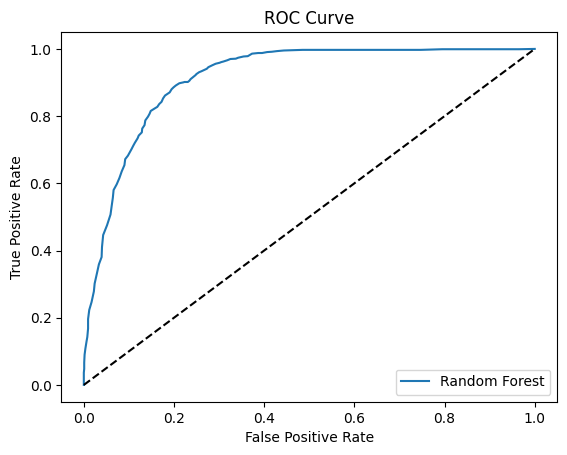

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**interpretability**

In [ ]:
pip install shap

In [ ]:
X_train.dtypes


,0
age,float64
balance,float64
day,float64
duration,float64
campaign,float64
pdays,float64
previous,float64
job_blue-collar,bool
job_entrepreneur,bool
job_housemaid,bool


In [ ]:
# Convert all bool columns to int
X_train_enc = X_train.astype(int)
X_test_enc  = X_test.astype(int)


In [ ]:
import shap

# Create explainer
explainer = shap.Explainer(rf, X_train_enc)
shap_values = explainer(X_test_enc)




100%|===================| 4460/4466 [02:25<00:00]       

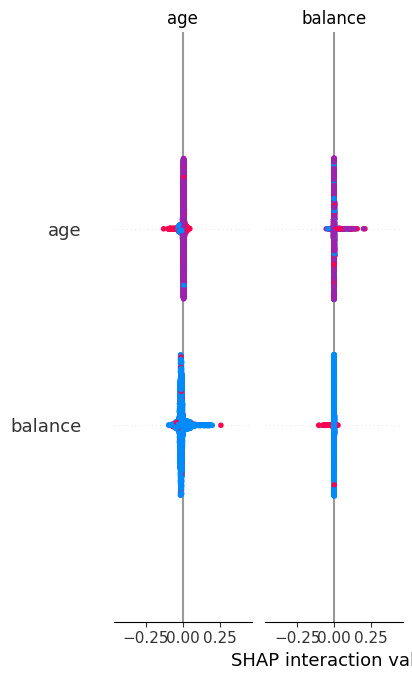

In [ ]:
# Global importance
shap.summary_plot(shap_values, X_test_enc, feature_names=X_train_enc.columns)

**Insights from SHAP Interaction Plot**

The plot reveals that the model's predictions are significantly influenced by the interaction between age and balance.

A high age and a high balance have a positive, synergistic effect on the model's output, pushing the prediction higher than the sum of their individual effects.

Conversely, there is no significant self-interaction effect for either age or balance on their own, meaning their impact is primarily due to their main effects and their interaction with other features.

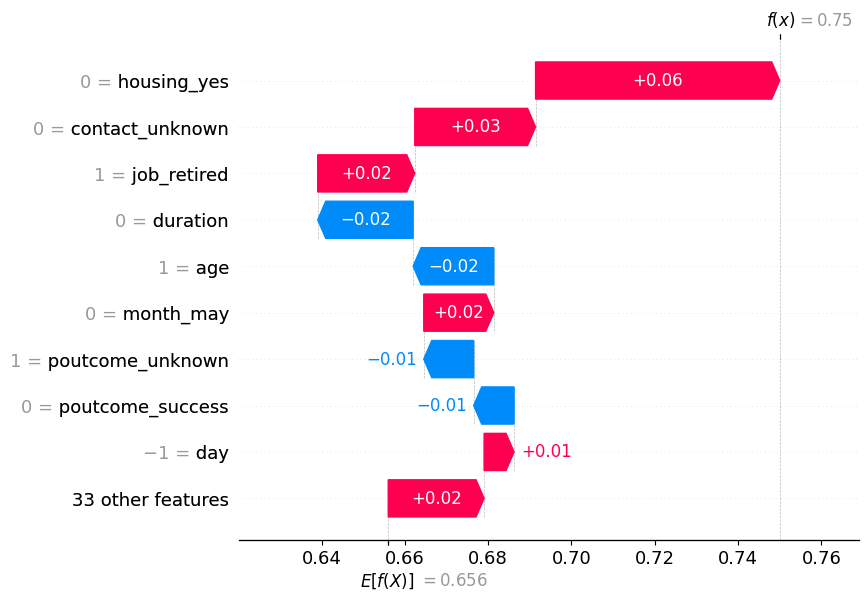

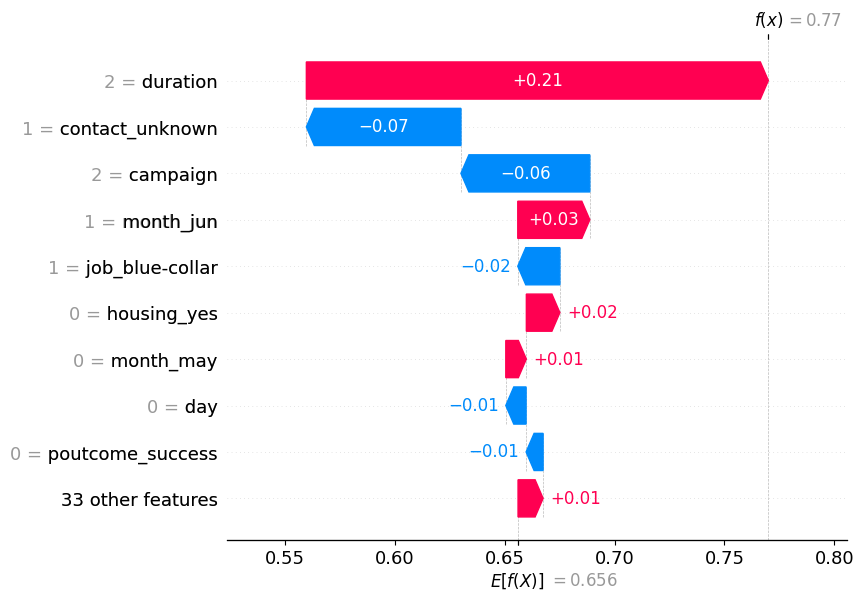

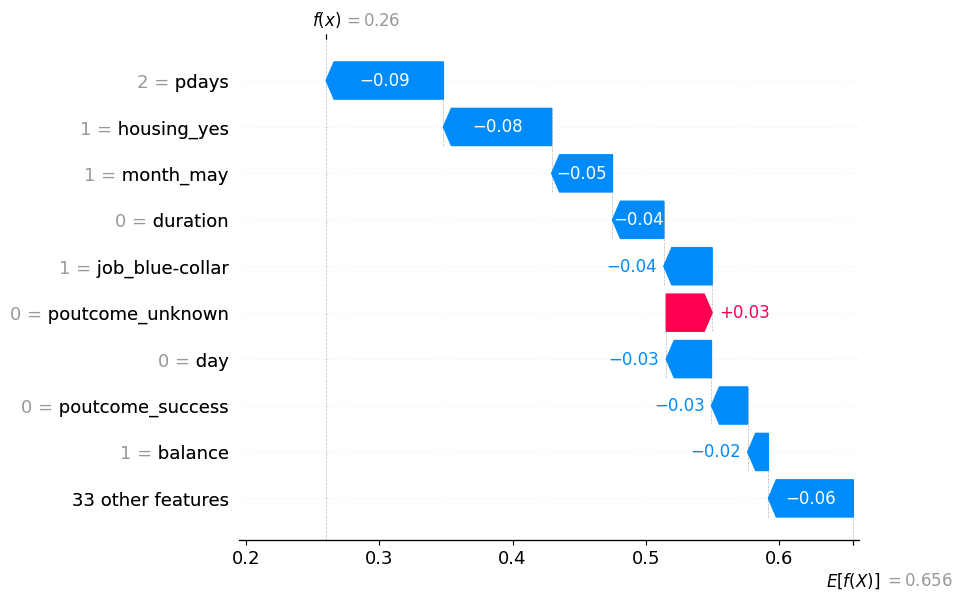

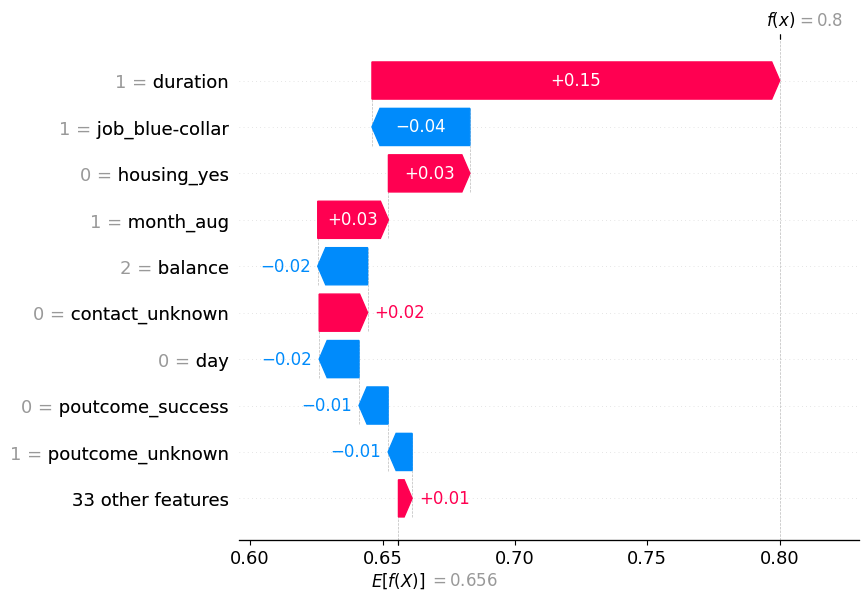

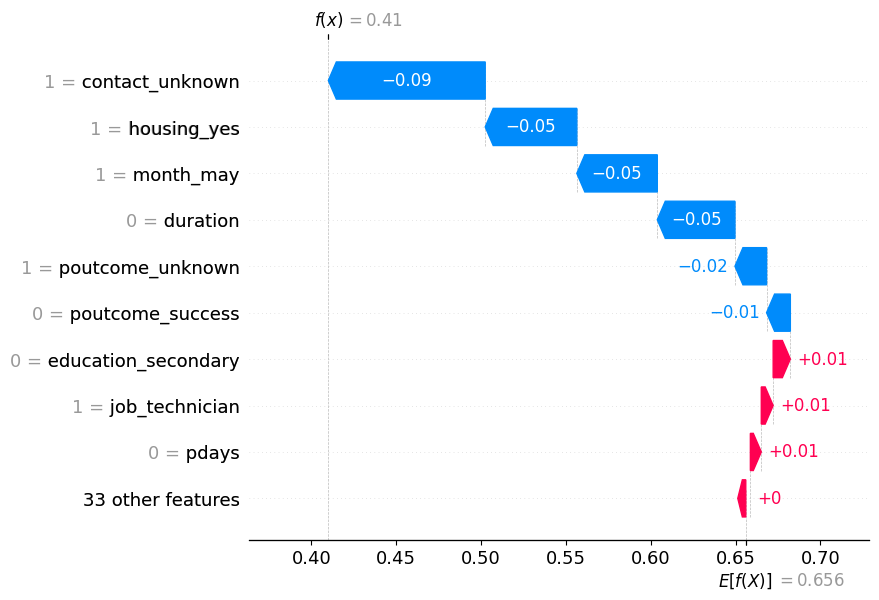

In [ ]:
# Waterfall for first 5 samples, positive class (index 1)
for i in range(5):
    shap.plots.waterfall(shap_values[i, :, 1])

# Insights from the SHAP Waterfall Plot:

**Base Value (E[f(X)]):**

The average model prediction across the dataset is 0.656 (baseline probability before considering this sample’s features).

**Final Prediction (f(x)):**

For this specific individual, the model predicts a probability of 0.80 for the positive class (e.g., customer subscribing).

This means features collectively increased the baseline prediction.

**Most Influential Features:**

Duration (+0.15): The strongest positive contributor. A longer call duration highly increases the likelihood of a positive outcome.

Job = blue-collar (−0.04): Being in a blue-collar job slightly decreases the probability.

Housing = yes (0 = no loan) (+0.03): Not having a housing loan increases the chance.

Month = August (+0.03): Contact in August has a positive impact.

Balance = 2 (−0.02): Lower account balance slightly decreases the probability.

Contact = unknown (+0.02): Unknown contact method slightly increases the probability.

****Minor Features:****

Features like day, poutcome_success, poutcome_unknown had small negative effects.

“33 other features” contributed only marginally (+0.01), showing they are less important for this prediction.

# **Final Conclusion with Insights**

The models (Logistic Regression and Random Forest) performed reasonably well, with ROC-AUC values of 0.90 and 0.91, respectively.

The most important features were age, balance, duration, and previous campaign outcomes.

**SHAP explanations showed:**

**For individuals →** predictions were influenced by personal financial attributes (balance, duration, previous contact).

**Globally →** age and balance were key drivers, especially when interacting together.

**Business insight:** Customers with higher age and higher balance are more likely to subscribe. This can guide targeted marketing campaigns.